#Economia europeia em 2022

<h2>Objetivos</h2>
<p>
Analisar os indicadores macroeconomicos da europa em 2022
</P>

Utilizar o algoritmo K-means para clusterizar os dados
<p>
</p>

[  link]https://www.kaggle.com/datasets/hanzlanawaz/economy-of-europe-2022)

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import KMeans


In [4]:
PATH = '/content/Economy_Indicators.csv'
df = pd.read_csv(PATH)

- Explorando os dados

In [5]:
display(df.shape)
display(df.head(20))
display(df.isnull().sum())
display(df.dtypes)
display(df.columns)

(42, 11)

Country    GDP  GDP Year-over-Year GDP Quarter-over-Quarterr  \
0        Euro Area  14493                 4.1                       0.8   
1          Germany   4223                 1.7                       0.1   
2   United Kingdom   3187                 4.4                       0.2   
3           France   2937                 4.2                       0.5   
4            Italy   2100                 5.0                       1.1   
5           Russia   1776                -4.1                      -0.8   
6            Spain   1425                 6.8                       1.5   
7      Netherlands   1018                 5.1                       2.6   
8           Turkey    815                 7.6                       2.1   
9      Switzerland    813                 2.8                       0.3   
10          Poland    674                 5.5                      -2.1   
11          Sweden    627                 3.8                       0.9   
12         Belgium    600                 3.3                       0.2   
13         Ireland    499                11.1                       1.8   
14          Norway    482                 3.9                       0.7   
15         Austria    477                 6.0                       1.5   
16         Denmark    397                 3.9                       0.9   
17         Finland    299                 3.0                       0.9   
18         Romania    284                 5.1                       1.8   
19  Czech Republic    282                 3.7                       0.5   

   Interest Rate  Inflation Rate  Jobless Rate  Gov. Budget  Debt/GDP  \
0           1.25           10.00          6.60         -5.1      95.6   
1           1.25           10.00          5.50         -3.7      69.3   
2           2.25            9.90          3.50         -6.0      95.9   
3           1.25            5.60          7.40         -6.5     112.9   
4           1.25            8.90          7.80         -7.2     150.8   
5            7.5           13.70          3.80          0.8      18.2   
6           1.25            9.00         12.48         -6.9     118.4   
7           1.25           14.50          3.80         -2.6      52.4   
8             12           83.45          9.60         -2.7      42.0   
9            0.5            3.30          1.90         -0.7      41.4   
10          6.75           17.20          4.80         -1.9      53.8   
11          1.75            9.80          6.60         -0.2      36.7   
12          1.25           11.27          5.80         -5.5     108.2   
13          1.25            8.70          4.30         -0.1      56.0   
14          2.25            6.90          3.30          9.1      43.2   
15          1.25           10.50          5.70         -5.9      82.8   
16          0.65           10.00          2.70          2.3      36.7   
17          1.25            7.60          6.70         -2.6      65.8   
18          6.25           15.90          5.10         -7.1      48.8   
19             7           18.00          3.50         -5.9      41.9   

    Current Account  Population  
0               2.5      342.56  
1               7.4       83.16  
2              -2.6       67.53  
3               0.4       67.63  
4               2.5       59.24  
5               6.8      145.55  
6               0.9       47.40  
7               9.0       17.48  
8              -1.7       84.68  
9               9.3        8.67  
10             -0.7       37.84  
11              5.3       10.38  
12             -0.4       11.55  
13             13.9        5.01  
14             15.0        5.43  
15             -0.5        8.93  
16              8.8        5.84  
17              0.9        5.55  
18             -7.0       19.20  
19             -0.8       10.50

Country                      0
GDP                          0
GDP Year-over-Year           0
GDP Quarter-over-Quarterr    0
Interest Rate                0
Inflation Rate               0
Jobless Rate                 0
Gov. Budget                  0
Debt/GDP                     0
Current Account              0
Population                   0
dtype: int64

Country                       object
GDP                            int64
GDP Year-over-Year           float64
GDP Quarter-over-Quarterr     object
Interest Rate                 object
Inflation Rate               float64
Jobless Rate                 float64
Gov. Budget                  float64
Debt/GDP                     float64
Current Account              float64
Population                   float64
dtype: object

Index(['Country', 'GDP', 'GDP Year-over-Year', 'GDP Quarter-over-Quarterr',
       'Interest Rate', 'Inflation Rate', 'Jobless Rate', 'Gov. Budget',
       'Debt/GDP', 'Current Account', 'Population'],
      dtype='object')

- Nome das variaveis

In [6]:
novos_nomes = {
    'Country': 'Pais',
    'GDP': 'PIB',
    'GDP Year-over-Year': 'PIB Anual',
    'GDP Quarter-over-Quarterr': 'PIB Trimestral',
    'Interest Rate': 'Taxa de Juros',
    'Inflation Rate': 'Taxa de Inflação',
    'Jobless Rate': 'Taxa de Desemprego',
    'Gov. Budget': 'Orçamento do Governo',
    'Debt/GDP': 'Dívida/PIB',
    'Current Account': 'Transações Correntes',
    'Population': 'População'
}

df.rename(columns=novos_nomes, inplace=True)
df.head(20)

Pais    PIB  PIB Anual PIB Trimestral Taxa de Juros  \
0        Euro Area  14493        4.1            0.8          1.25   
1          Germany   4223        1.7            0.1          1.25   
2   United Kingdom   3187        4.4            0.2          2.25   
3           France   2937        4.2            0.5          1.25   
4            Italy   2100        5.0            1.1          1.25   
5           Russia   1776       -4.1           -0.8           7.5   
6            Spain   1425        6.8            1.5          1.25   
7      Netherlands   1018        5.1            2.6          1.25   
8           Turkey    815        7.6            2.1            12   
9      Switzerland    813        2.8            0.3           0.5   
10          Poland    674        5.5           -2.1          6.75   
11          Sweden    627        3.8            0.9          1.75   
12         Belgium    600        3.3            0.2          1.25   
13         Ireland    499       11.1            1.8          1.25   
14          Norway    482        3.9            0.7          2.25   
15         Austria    477        6.0            1.5          1.25   
16         Denmark    397        3.9            0.9          0.65   
17         Finland    299        3.0            0.9          1.25   
18         Romania    284        5.1            1.8          6.25   
19  Czech Republic    282        3.7            0.5             7   

    Taxa de Inflação  Taxa de Desemprego  Orçamento do Governo  Dívida/PIB  \
0              10.00                6.60                  -5.1        95.6   
1              10.00                5.50                  -3.7        69.3   
2               9.90                3.50                  -6.0        95.9   
3               5.60                7.40                  -6.5       112.9   
4               8.90                7.80                  -7.2       150.8   
5              13.70                3.80                   0.8        18.2   
6               9.00               12.48                  -6.9       118.4   
7              14.50                3.80                  -2.6        52.4   
8              83.45                9.60                  -2.7        42.0   
9               3.30                1.90                  -0.7        41.4   
10             17.20                4.80                  -1.9        53.8   
11              9.80                6.60                  -0.2        36.7   
12             11.27                5.80                  -5.5       108.2   
13              8.70                4.30                  -0.1        56.0   
14              6.90                3.30                   9.1        43.2   
15             10.50                5.70                  -5.9        82.8   
16             10.00                2.70                   2.3        36.7   
17              7.60                6.70                  -2.6        65.8   
18             15.90                5.10                  -7.1        48.8   
19             18.00                3.50                  -5.9        41.9   

    Transações Correntes  População  
0                    2.5     342.56  
1                    7.4      83.16  
2                   -2.6      67.53  
3                    0.4      67.63  
4                    2.5      59.24  
5                    6.8     145.55  
6                    0.9      47.40  
7                    9.0      17.48  
8                   -1.7      84.68  
9                    9.3       8.67  
10                  -0.7      37.84  
11                   5.3      10.38  
12                  -0.4      11.55  
13                  13.9       5.01  
14                  15.0       5.43  
15                  -0.5       8.93  
16                   8.8       5.84  
17                   0.9       5.55  
18                  -7.0      19.20  
19                  -0.8      10.50

- Tratamento das variaveis numericas

In [7]:
df['PIB Trimestral'] = pd.to_numeric(df['PIB Trimestral'], errors='coerce')
df['Taxa de Juros'] = pd.to_numeric(df['Taxa de Juros'], errors='coerce')
display(df.dtypes)

Pais                     object
PIB                       int64
PIB Anual               float64
PIB Trimestral          float64
Taxa de Juros           float64
Taxa de Inflação        float64
Taxa de Desemprego      float64
Orçamento do Governo    float64
Dívida/PIB              float64
Transações Correntes    float64
População               float64
dtype: object

In [8]:
dados_numericos = df.drop(['Pais'], axis=1)

- Matriz de dispersão

<function matplotlib.pyplot.show(close=None, block=None)>

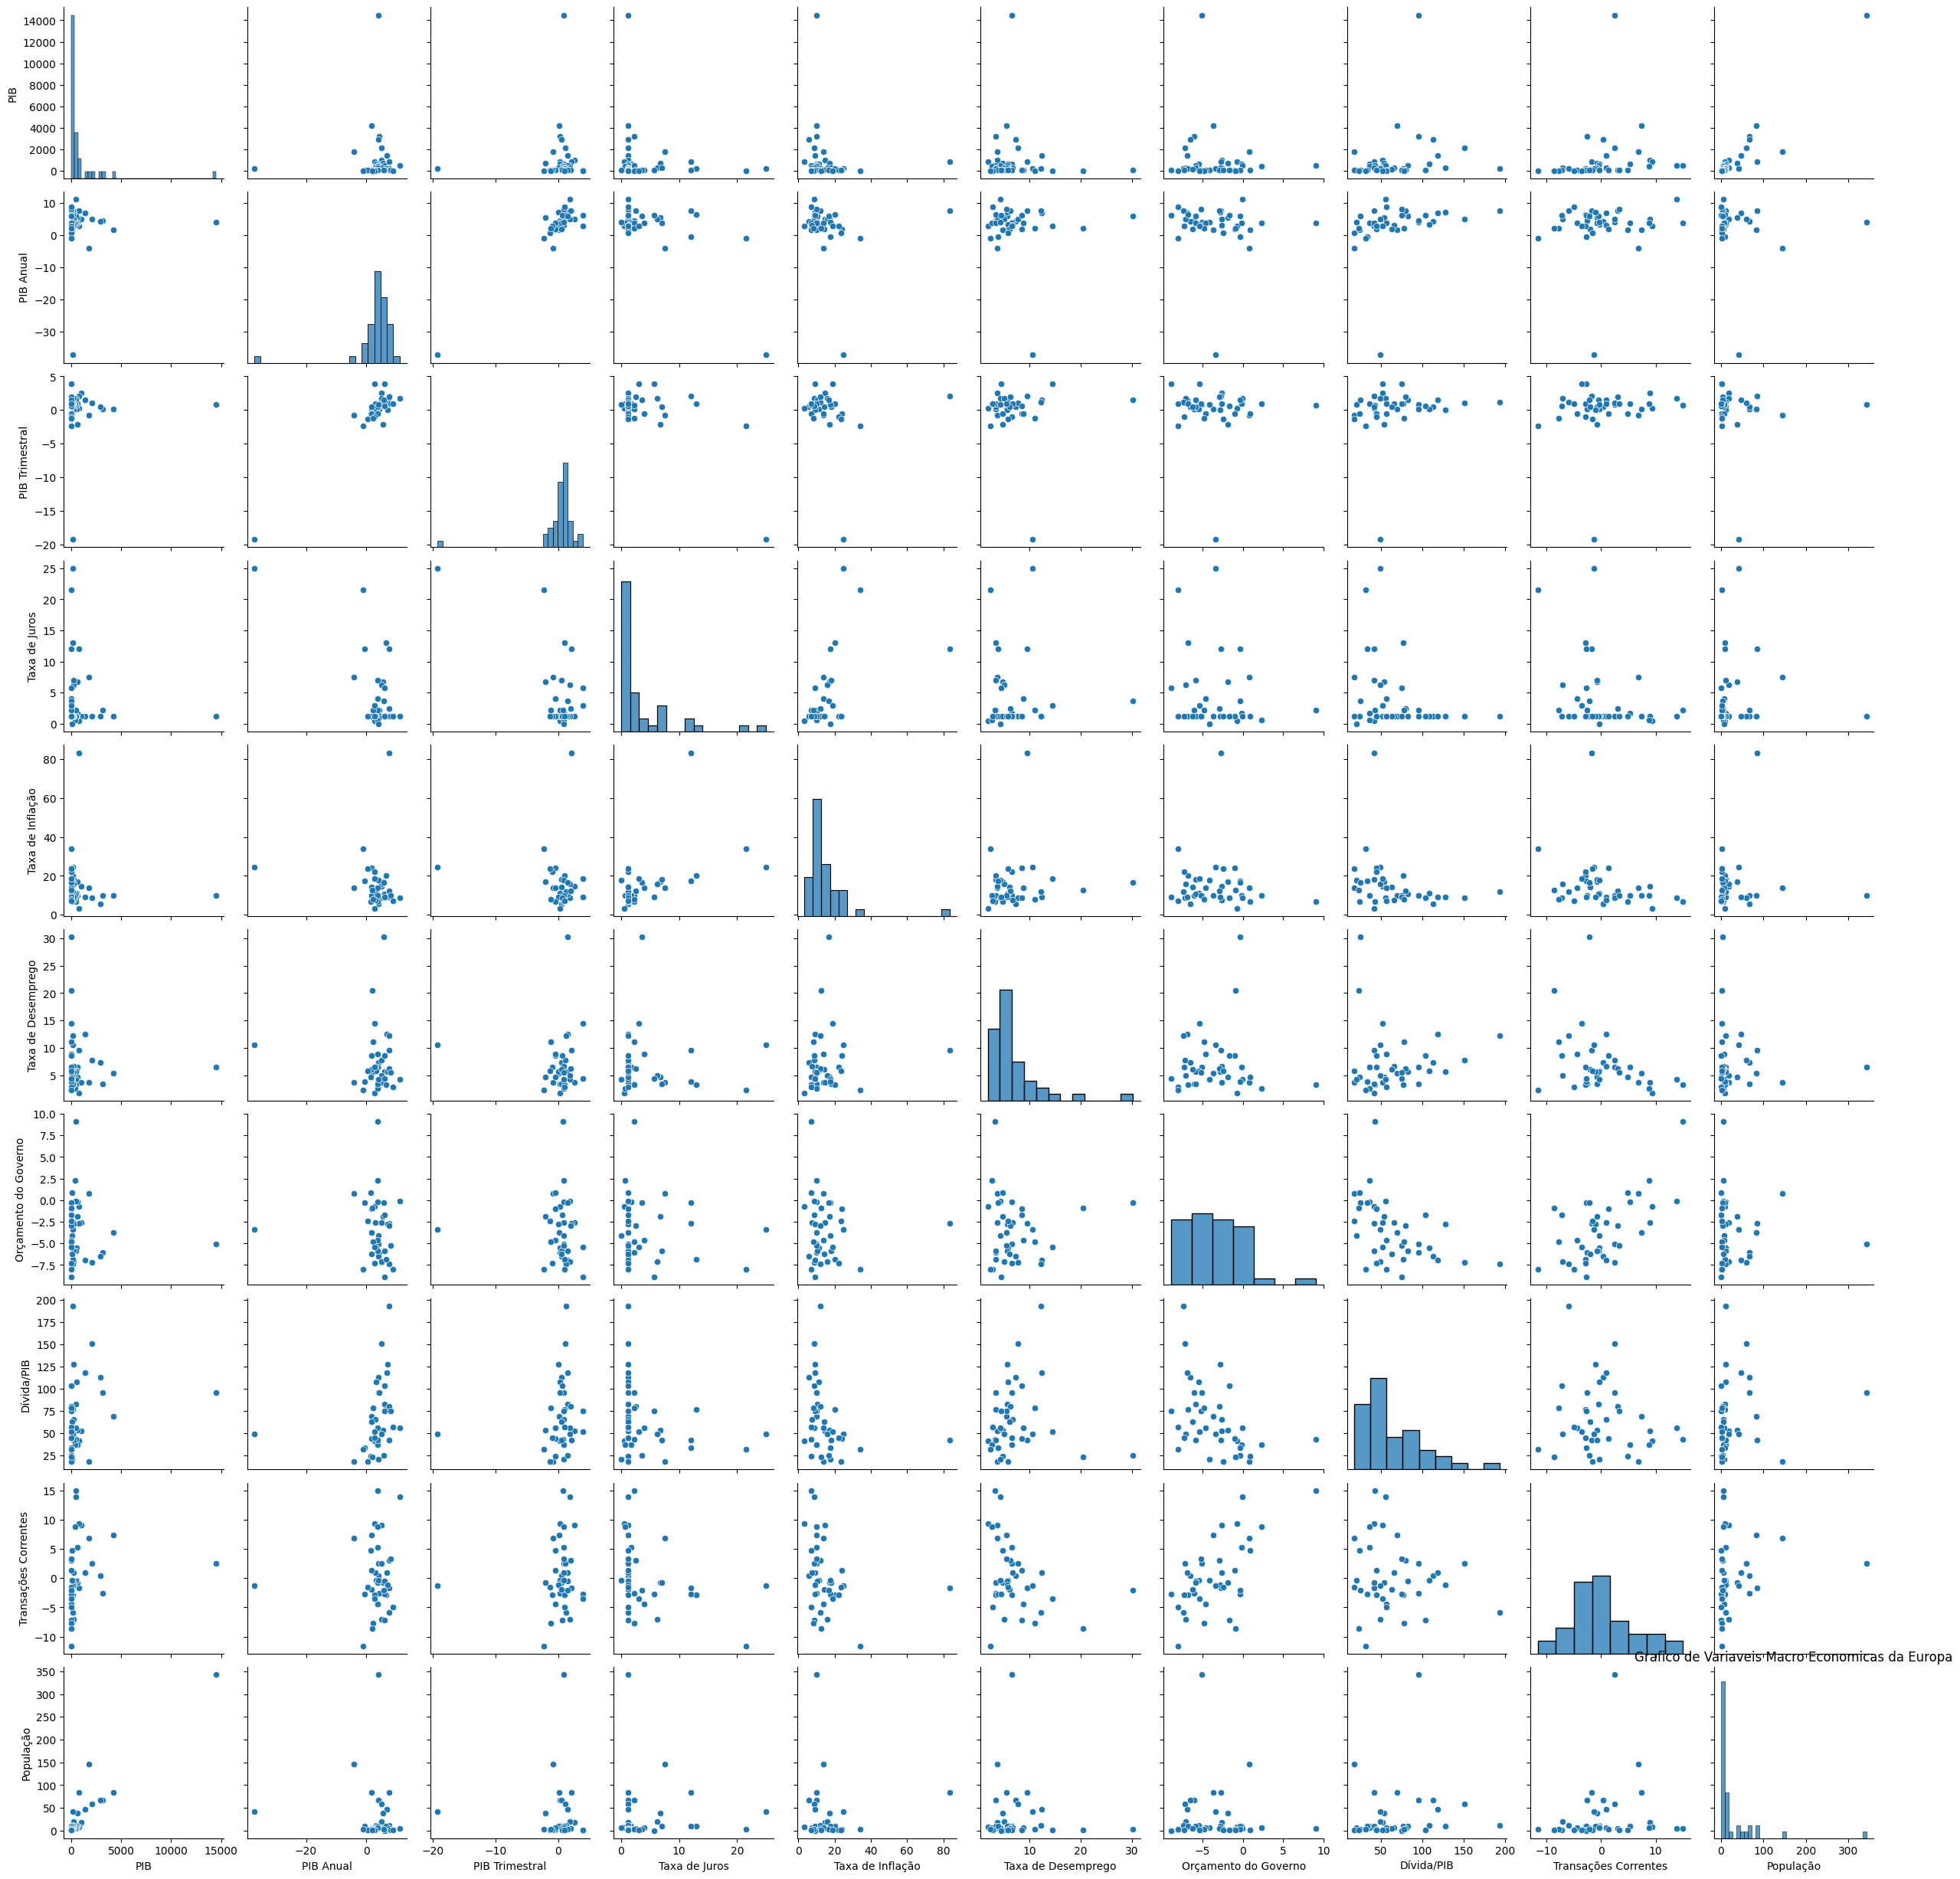

In [9]:
sns.pairplot(dados_numericos)
plt.title('Grafico de Variaveis Macro Economicas da Europa')
plt.show

<h2>Insights Gerais</h2>
<o>
Correlações esperadas e inesperadas: O gráfico confirma correlações esperadas (como PIB e População, ou Taxa de Juros e Inflação), mas também sugere que algumas relações que poderiam ser intuitivas (como Dívida/PIB com Orçamento do Governo) podem não ser tão fortes ou lineares na prática, dependendo dos dados específicos.</p>
<p>
Distribuições assimétricas: A assimetria para a direita em diversas variáveis (PIB, Taxa de Juros, Inflação, Desemprego) sugere que as médias podem ser enganosas. A maioria dos países se concentra em um intervalo mais baixo, com alguns outliers puxando a média para cima.</p>

- Histograma das variáveis

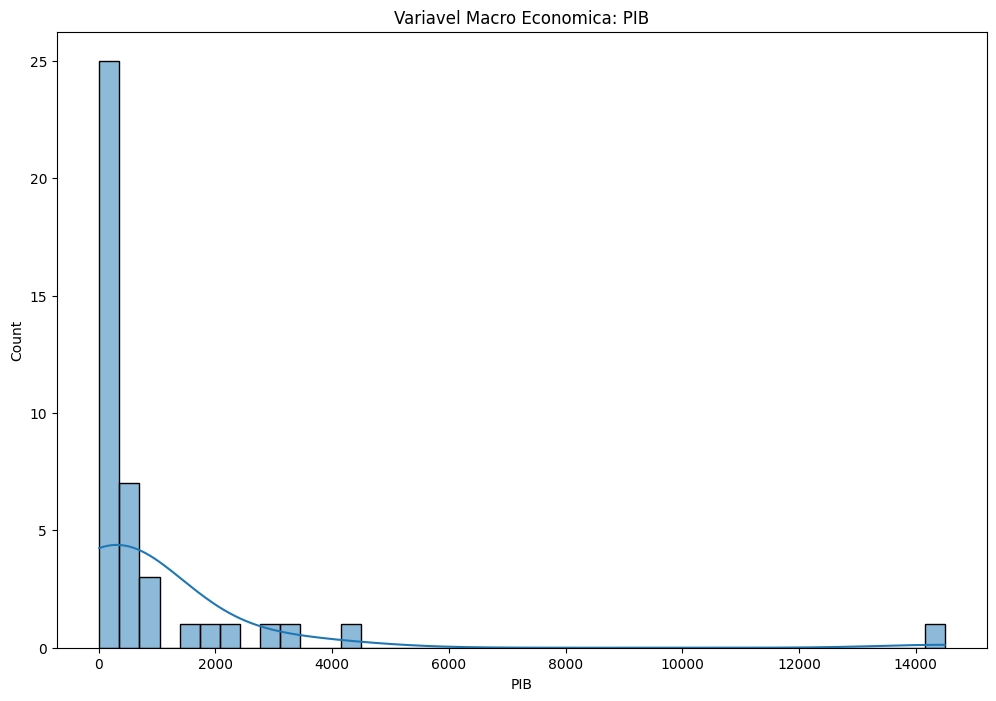

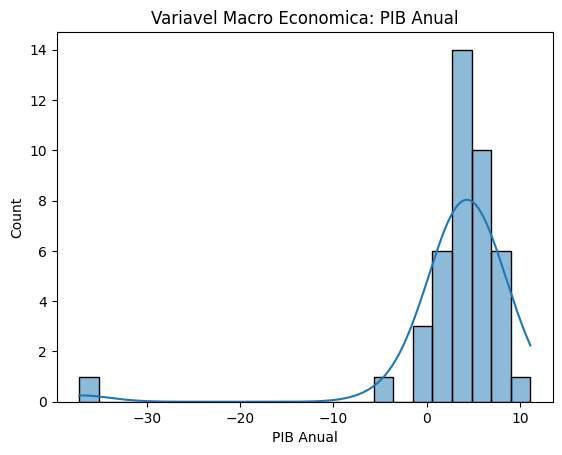

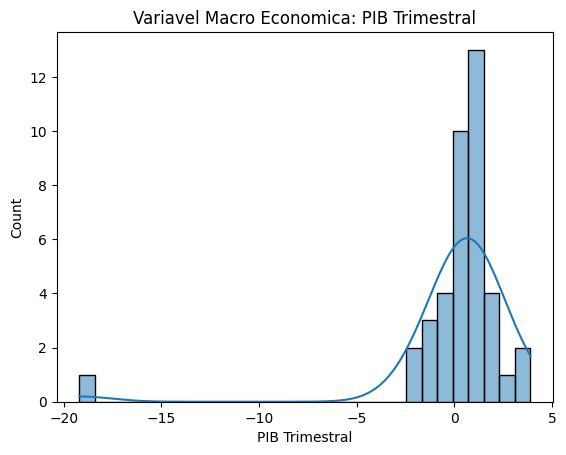

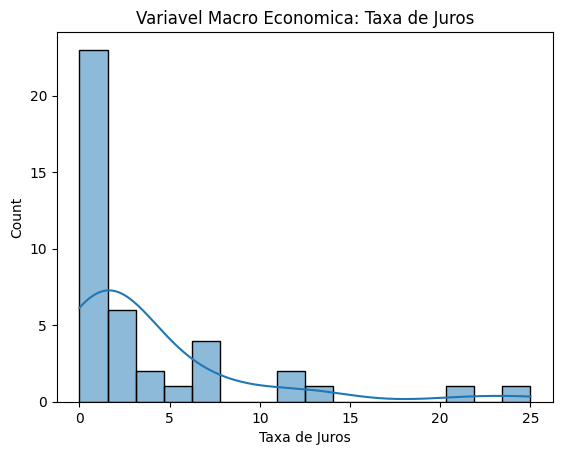

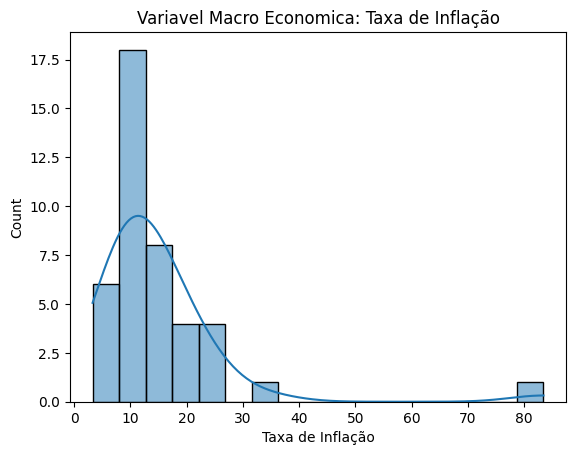

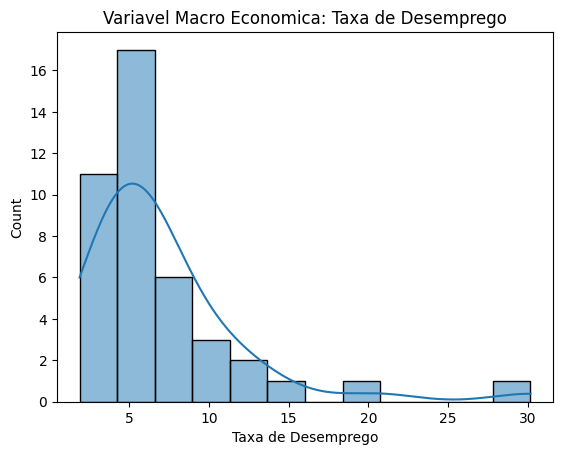

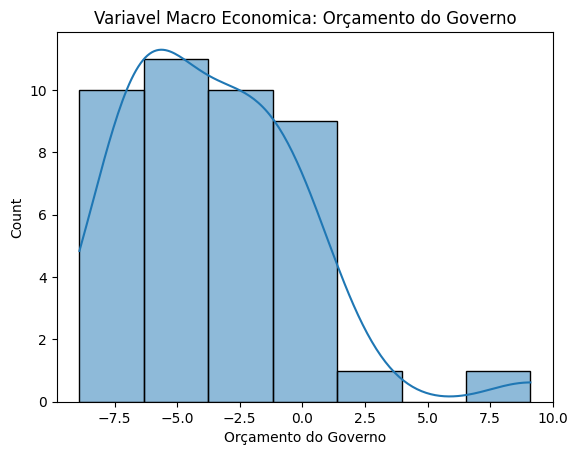

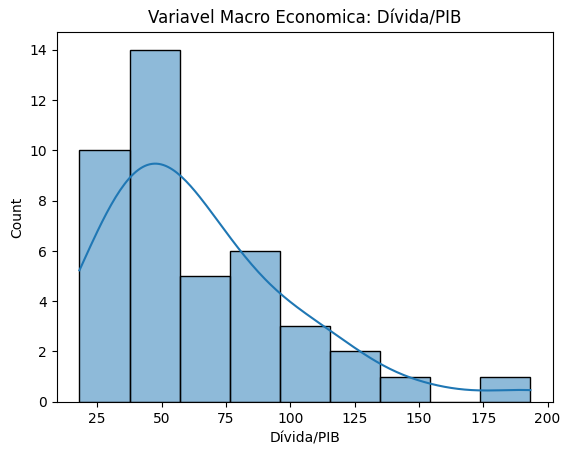

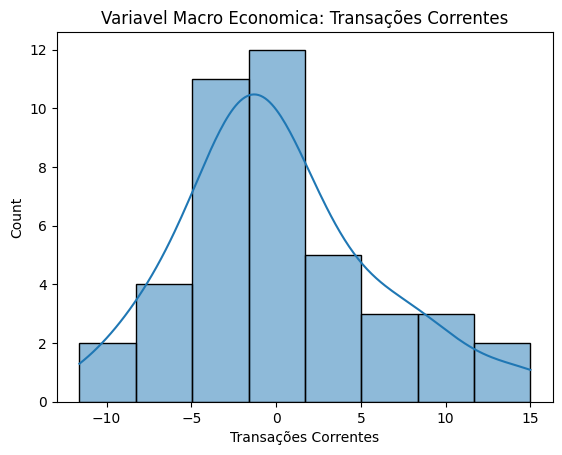

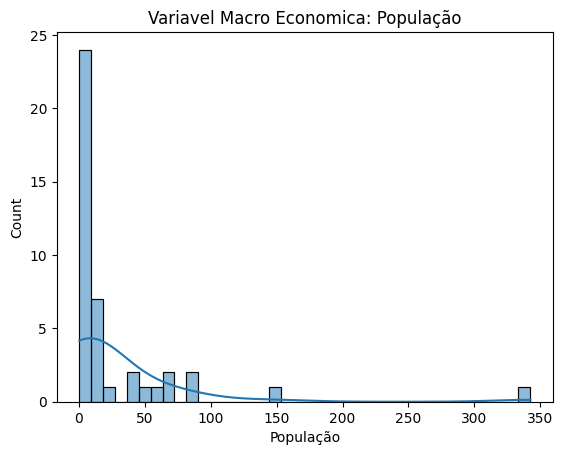

In [10]:
plt.figure(figsize=(12,8))
for i in dados_numericos:
  sns.histplot(dados_numericos[i], kde=True)
  plt.title(f'Variavel Macro Economica: {i}')
  plt.show()

- Mapa de calor da correlação entre as variáveis

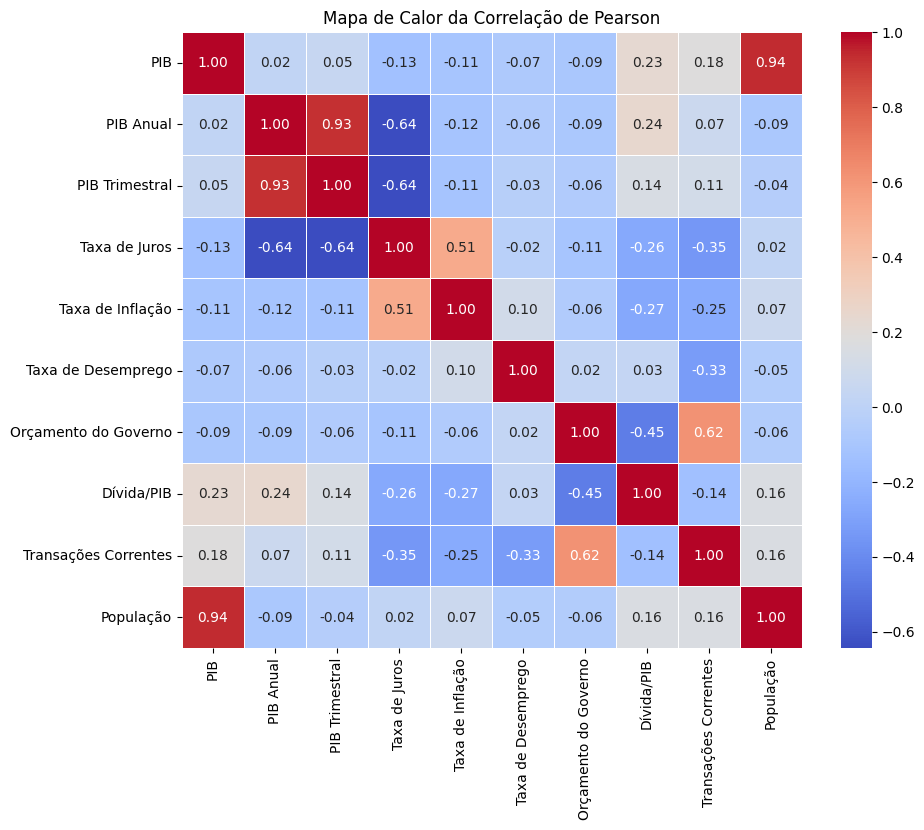

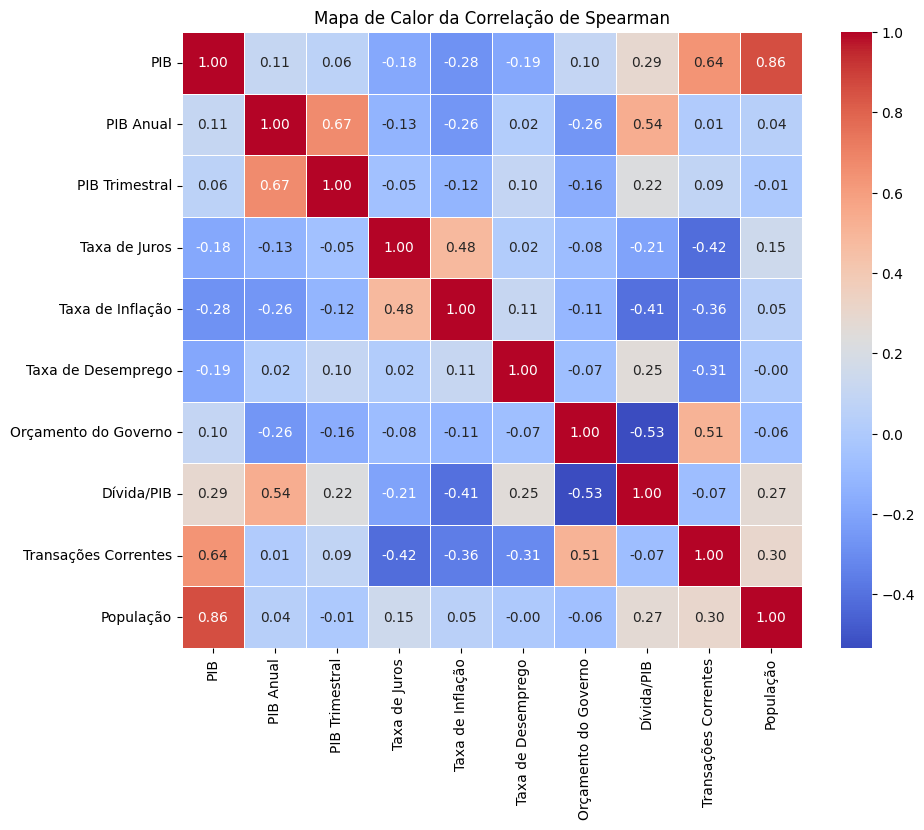

In [11]:
correlacao = dados_numericos.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor da Correlação de Pearson')
plt.show()

correlacao_spearman = dados_numericos.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(correlacao_spearman, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor da Correlação de Spearman')
plt.show()

<h2>Insights Gerais</h2>
<p>
O gráfico revela que o PIB está fortemente correlacionado com a População e o PIB Anual, o que é um resultado esperado. A Taxa de Juros tem um impacto negativo notável no PIB, o que alinha-se com a teoria econômica. Por outro lado, a relação entre o PIB e a Taxa de Inflação e a Taxa de Desemprego é surpreendentemente fraca, o que sugere que o crescimento econômico não é o principal fator que impulsiona ou inibe essas variáveis neste conjunto de dados específico.


</p>

<h2>Agregando dados de latitude e longitude</h2>

In [12]:

locais = {
    'Germany': {'latitude': 51.1657, 'longitude': 10.4515},
    'United Kingdom': {'latitude': 55.3781, 'longitude': -3.4360},
    'France': {'latitude': 46.2276, 'longitude': 2.2137},
    'Italy': {'latitude': 41.8719, 'longitude': 12.5674},
    'Russia': {'latitude': 61.5240, 'longitude': 105.3188},
    'Spain': {'latitude': 40.4637, 'longitude': -3.7492},
    'Netherlands': {'latitude': 52.1326, 'longitude': 5.2913},
    'Turkey': {'latitude': 38.9637, 'longitude': 35.2433},
    'Switzerland': {'latitude': 46.8182, 'longitude': 8.2275},
    'Poland': {'latitude': 51.9194, 'longitude': 19.1451},
    'Sweden': {'latitude': 60.1282, 'longitude': 18.6435},
    'Belgium': {'latitude': 50.5039, 'longitude': 4.4699},
    'Ireland': {'latitude': 53.4129, 'longitude': -8.2439},
    'Norway': {'latitude': 60.4720, 'longitude': 8.4689},
    'Austria': {'latitude': 47.5162, 'longitude': 14.5501},
    'Denmark': {'latitude': 56.2639, 'longitude': 9.5018},
    'Finland': {'latitude': 61.9241, 'longitude': 25.7482},
    'Romania': {'latitude': 45.9432, 'longitude': 24.9668},
    'Czech Republic': {'latitude': 49.8175, 'longitude': 15.4730},
    'Portugal': {'latitude': 39.3999, 'longitude': -8.2245},
    'Greece': {'latitude': 39.0742, 'longitude': 21.8243},
    'Ukraine': {'latitude': 48.3794, 'longitude': 31.1656},
    'Hungary': {'latitude': 47.1625, 'longitude': 19.5033},
    'Slovakia': {'latitude': 48.6690, 'longitude': 19.6990},
    'Luxembourg': {'latitude': 49.8153, 'longitude': 6.1296},
    'Bulgaria': {'latitude': 42.7339, 'longitude': 25.4858},
    'Croatia': {'latitude': 45.1000, 'longitude': 15.2000},
    'Belarus': {'latitude': 53.7098, 'longitude': 27.9534},
    'Lithuania': {'latitude': 55.1694, 'longitude': 23.8813},
    'Serbia': {'latitude': 44.0165, 'longitude': 21.0059},
    'Slovenia': {'latitude': 46.1512, 'longitude': 14.9955},
    'Latvia': {'latitude': 56.8796, 'longitude': 24.6032},
    'Estonia': {'latitude': 58.5953, 'longitude': 25.0136},
    'Cyprus': {'latitude': 35.1264, 'longitude': 33.4299},
    'Iceland': {'latitude': 64.9631, 'longitude': -19.0208},
    'Bosnia and Herzegovina': {'latitude': 43.9159, 'longitude': 17.6791},
    'Albania': {'latitude': 41.1533, 'longitude': 20.1683},
    'Malta': {'latitude': 35.9375, 'longitude': 14.3754},
    'Moldova': {'latitude': 47.4116, 'longitude': 28.3699},
    'North Macedonia': {'latitude': 41.6086, 'longitude': 21.7453},
    'Kosovo': {'latitude': 42.6026, 'longitude': 21.1655}
}

df_locais = pd.DataFrame.from_dict(locais, orient='index')
df_locais.columns = ['Latitude', 'Longitude']

df_locais.reset_index(inplace=True)
df_locais.rename(columns={'index': 'Pais'}, inplace=True)
df_geo = df.merge(df_locais, on='Pais', how='inner')
df_geo.to_csv('Base_macroeconomia_europa.csv')


- Mapa do desemprego

In [13]:
desemprego = df_geo[['Taxa de Desemprego','Latitude','Longitude','Pais']]

In [14]:

fig = px.scatter_geo(desemprego,
                     lat='Latitude',
                     lon='Longitude',
                     hover_name='Pais',
                     size=abs(desemprego['Taxa de Desemprego']),
                     projection='natural earth',
                     title='Mapa da Magnitude da Taxa de Desemprego')
fig.show()

<p>
O sudeste europeu apresenta as maiores taxas de desemprego.
</p>

- Mapa da inflação

In [15]:
inflacao = df_geo[['Taxa de Inflação','Latitude','Longitude','Pais']]

In [16]:
fig = px.choropleth(inflacao,
                    locations="Pais",
                    locationmode='country names',
                    color="Taxa de Inflação",
                    hover_name="Pais",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Mapa do Inflação Europeu por País')
fig.show()

- Mapa dos PIBS

In [17]:
pib = df_geo[['PIB','PIB Anual','Latitude','Longitude','Pais']]


In [18]:

fig = px.scatter_geo(pib,
                     lat='Latitude',
                     lon='Longitude',
                     hover_name='Pais',
                     size=abs(pib['PIB']),
                     projection='natural earth',
                     title='Mapa da Magnitude da Variação Anual do PIB  Europa')
fig.show()

In [19]:

fig = px.scatter_geo(pib,
                     lat='Latitude',
                     lon='Longitude',
                     hover_name='Pais',
                     size=abs(pib['PIB Anual']),
                     projection='natural earth',
                     title='Mapa da Magnitude da Variação Anual do PIB na Europa')
fig.show()

In [20]:
fig = px.choropleth(df,
                    locations="Pais",
                    locationmode='country names',
                    color="PIB",
                    hover_name="Pais",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Mapa do PIB Europeu por País')
fig.show()

<H2>Algoritimo de Clusterização</h2>

<p>Indentificar os clusters das variáveis macro economicas da europa</p>

- Seleção das variáveis economicas

In [21]:
var_economia = df.drop(['Pais'], axis=1)

- Deletando os valores nulos

In [22]:
display(var_economia.isnull().sum())

PIB                     0
PIB Anual               0
PIB Trimestral          2
Taxa de Juros           1
Taxa de Inflação        0
Taxa de Desemprego      0
Orçamento do Governo    0
Dívida/PIB              0
Transações Correntes    0
População               0
dtype: int64

In [23]:
var_economia.dropna(inplace=True)

<h3>Aplicando o modelo</h3>

In [24]:
wcss = []

for K in range(1, 5):
  modelo = KMeans(n_clusters=K, n_init=10, random_state=42)
  modelo.fit(var_economia)
  wcss.append(modelo.inertia_)

/tmp/ipython-input-4177680666.py:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



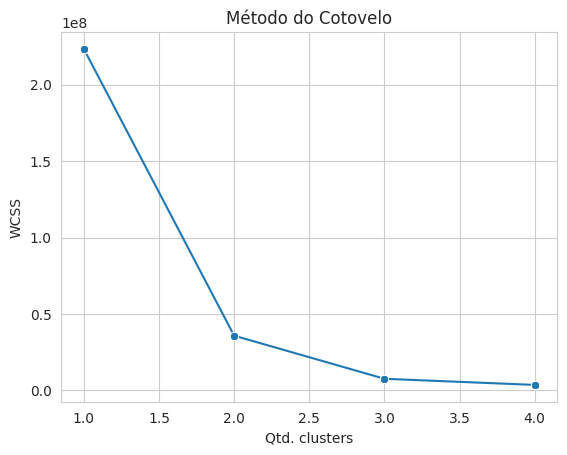

In [25]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(x=range(1, 5), y=wcss, marker="8", palette="pastel")
  grafico.set(title='Método do Cotovelo', ylabel='WCSS', xlabel='Qtd. clusters');

<p>Numero ideal de cluster de 2 a 3</p>

<h2>Modelo com 2 clusters</h2>

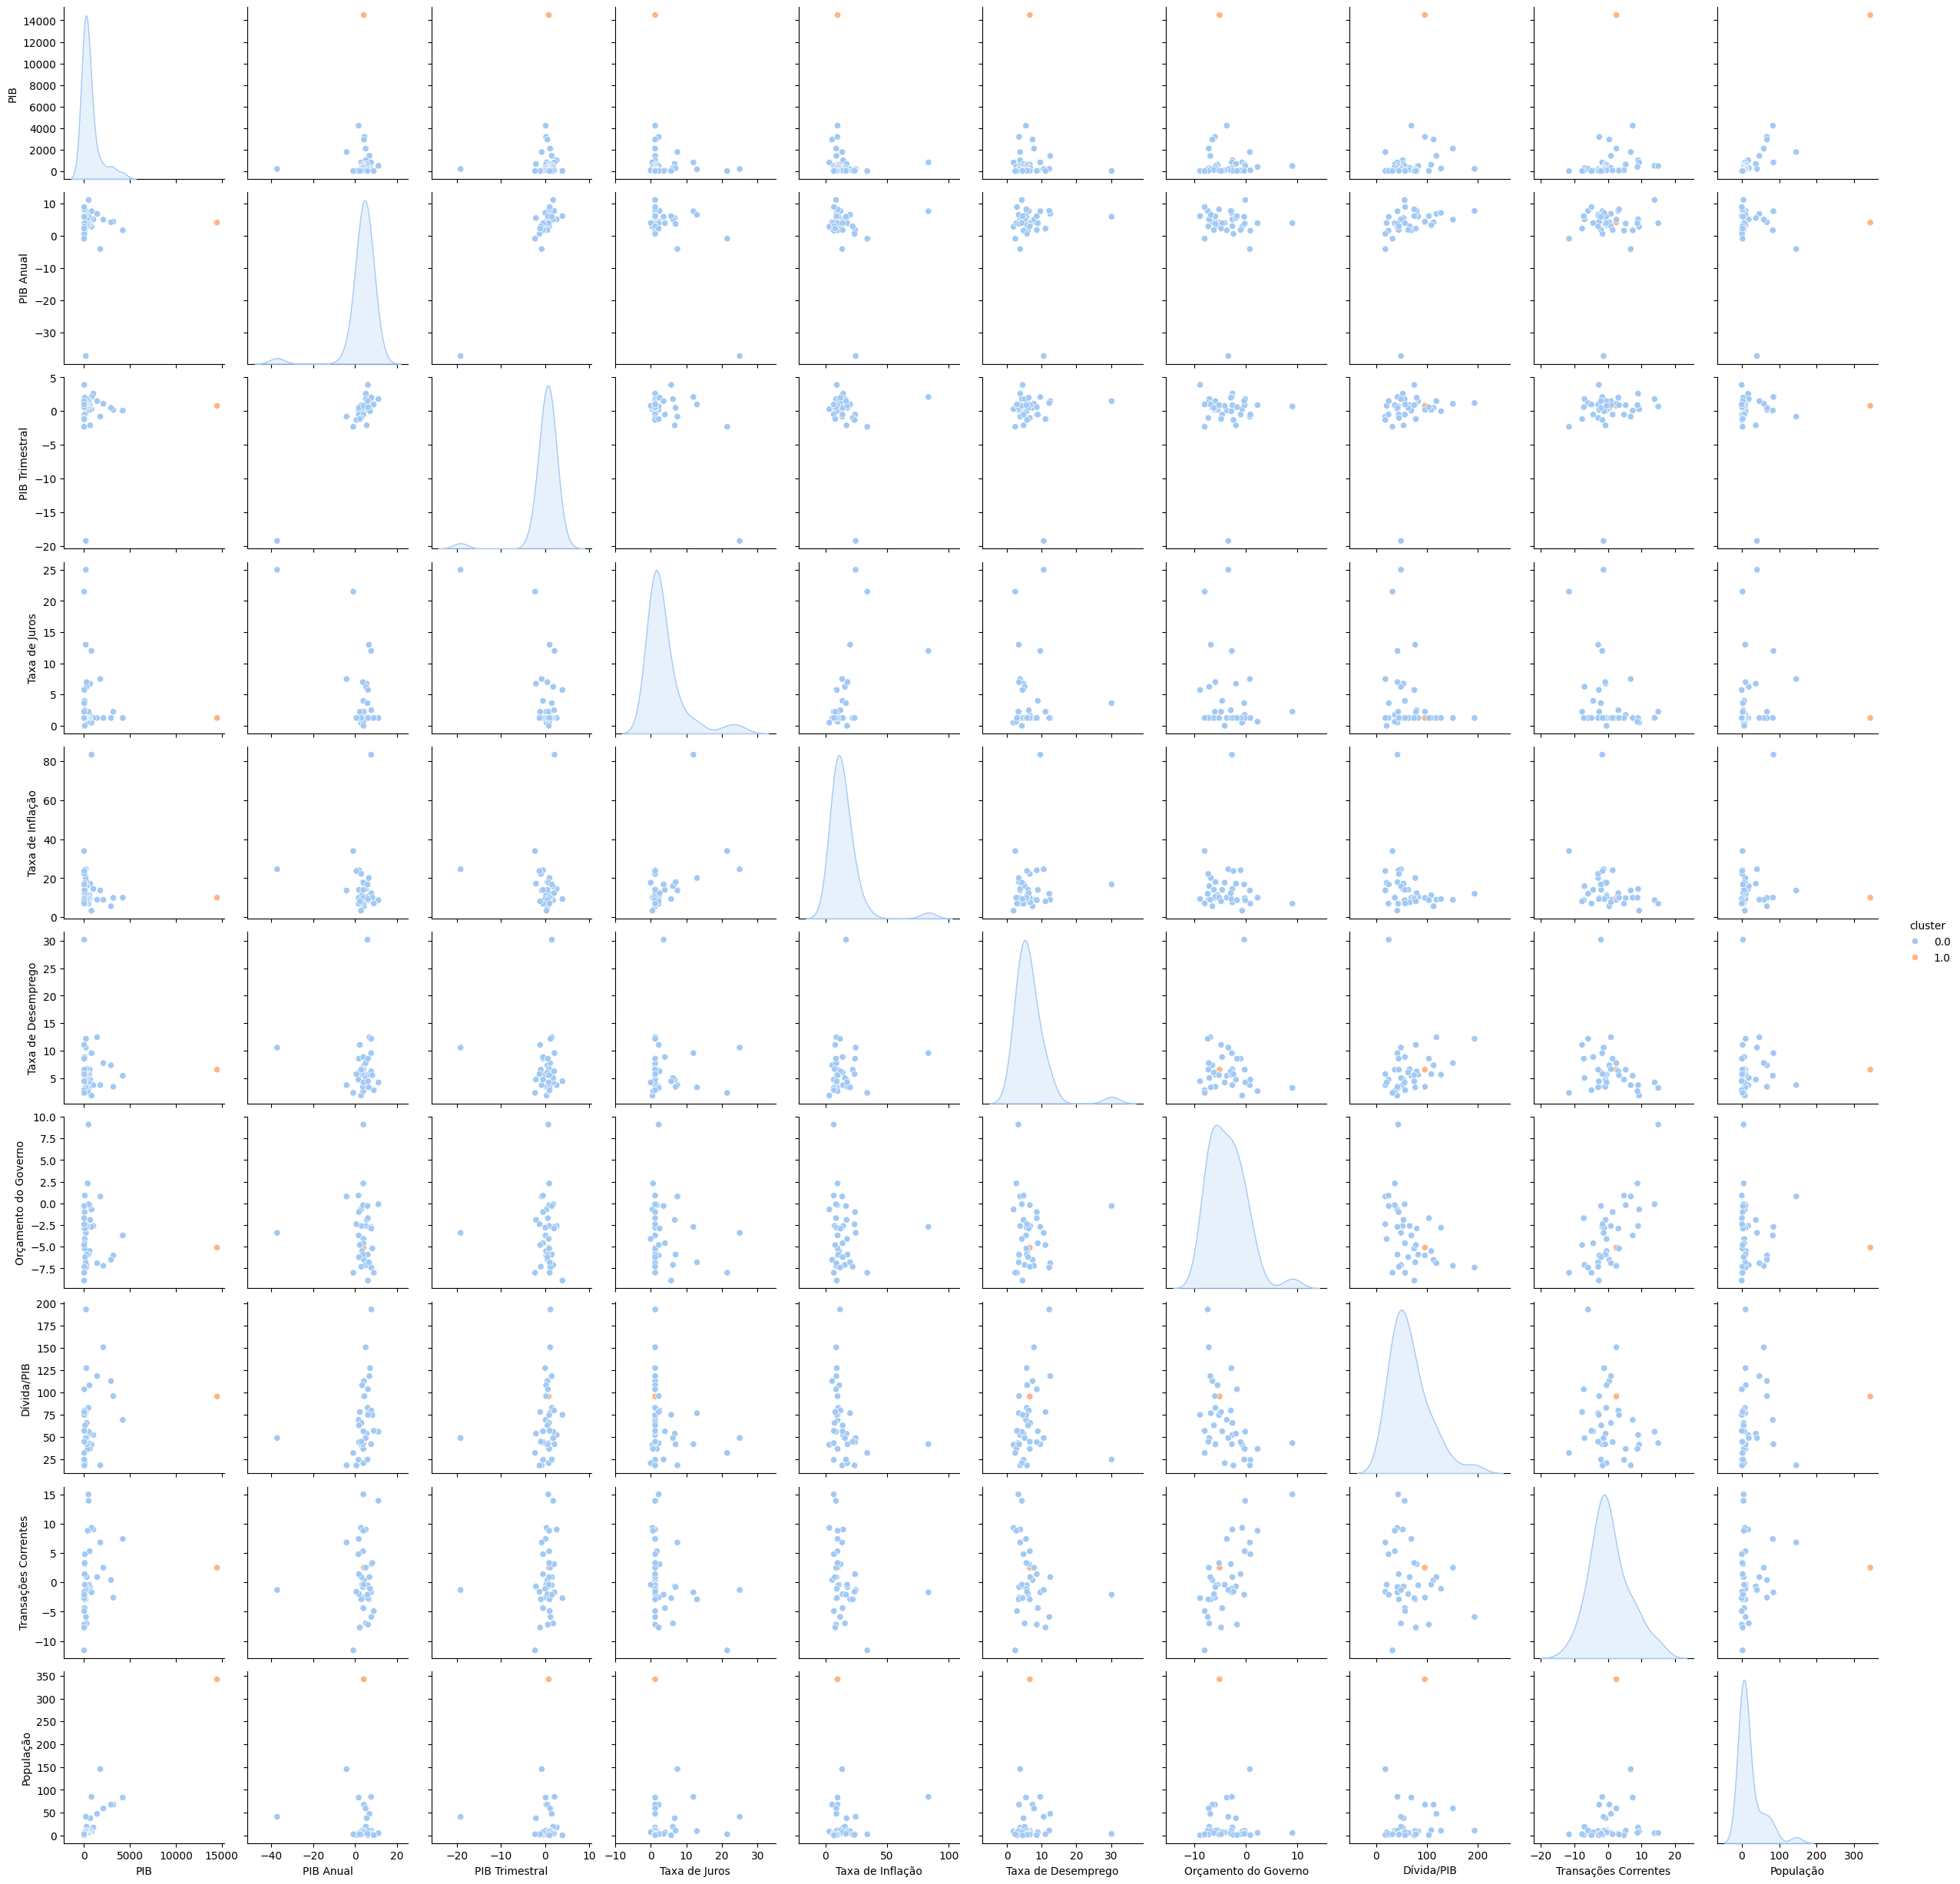

In [26]:
  modelo = KMeans(n_clusters=2, n_init=10, random_state=42)
  modelo.fit(var_economia)

  clusters = modelo.labels_
df_cluster = pd.concat([var_economia, pd.DataFrame(clusters, columns=['cluster'])], axis=1)

sns.pairplot(data=df_cluster, hue='cluster', palette="pastel");

<h2>Modelo com 3 clusters</h2>

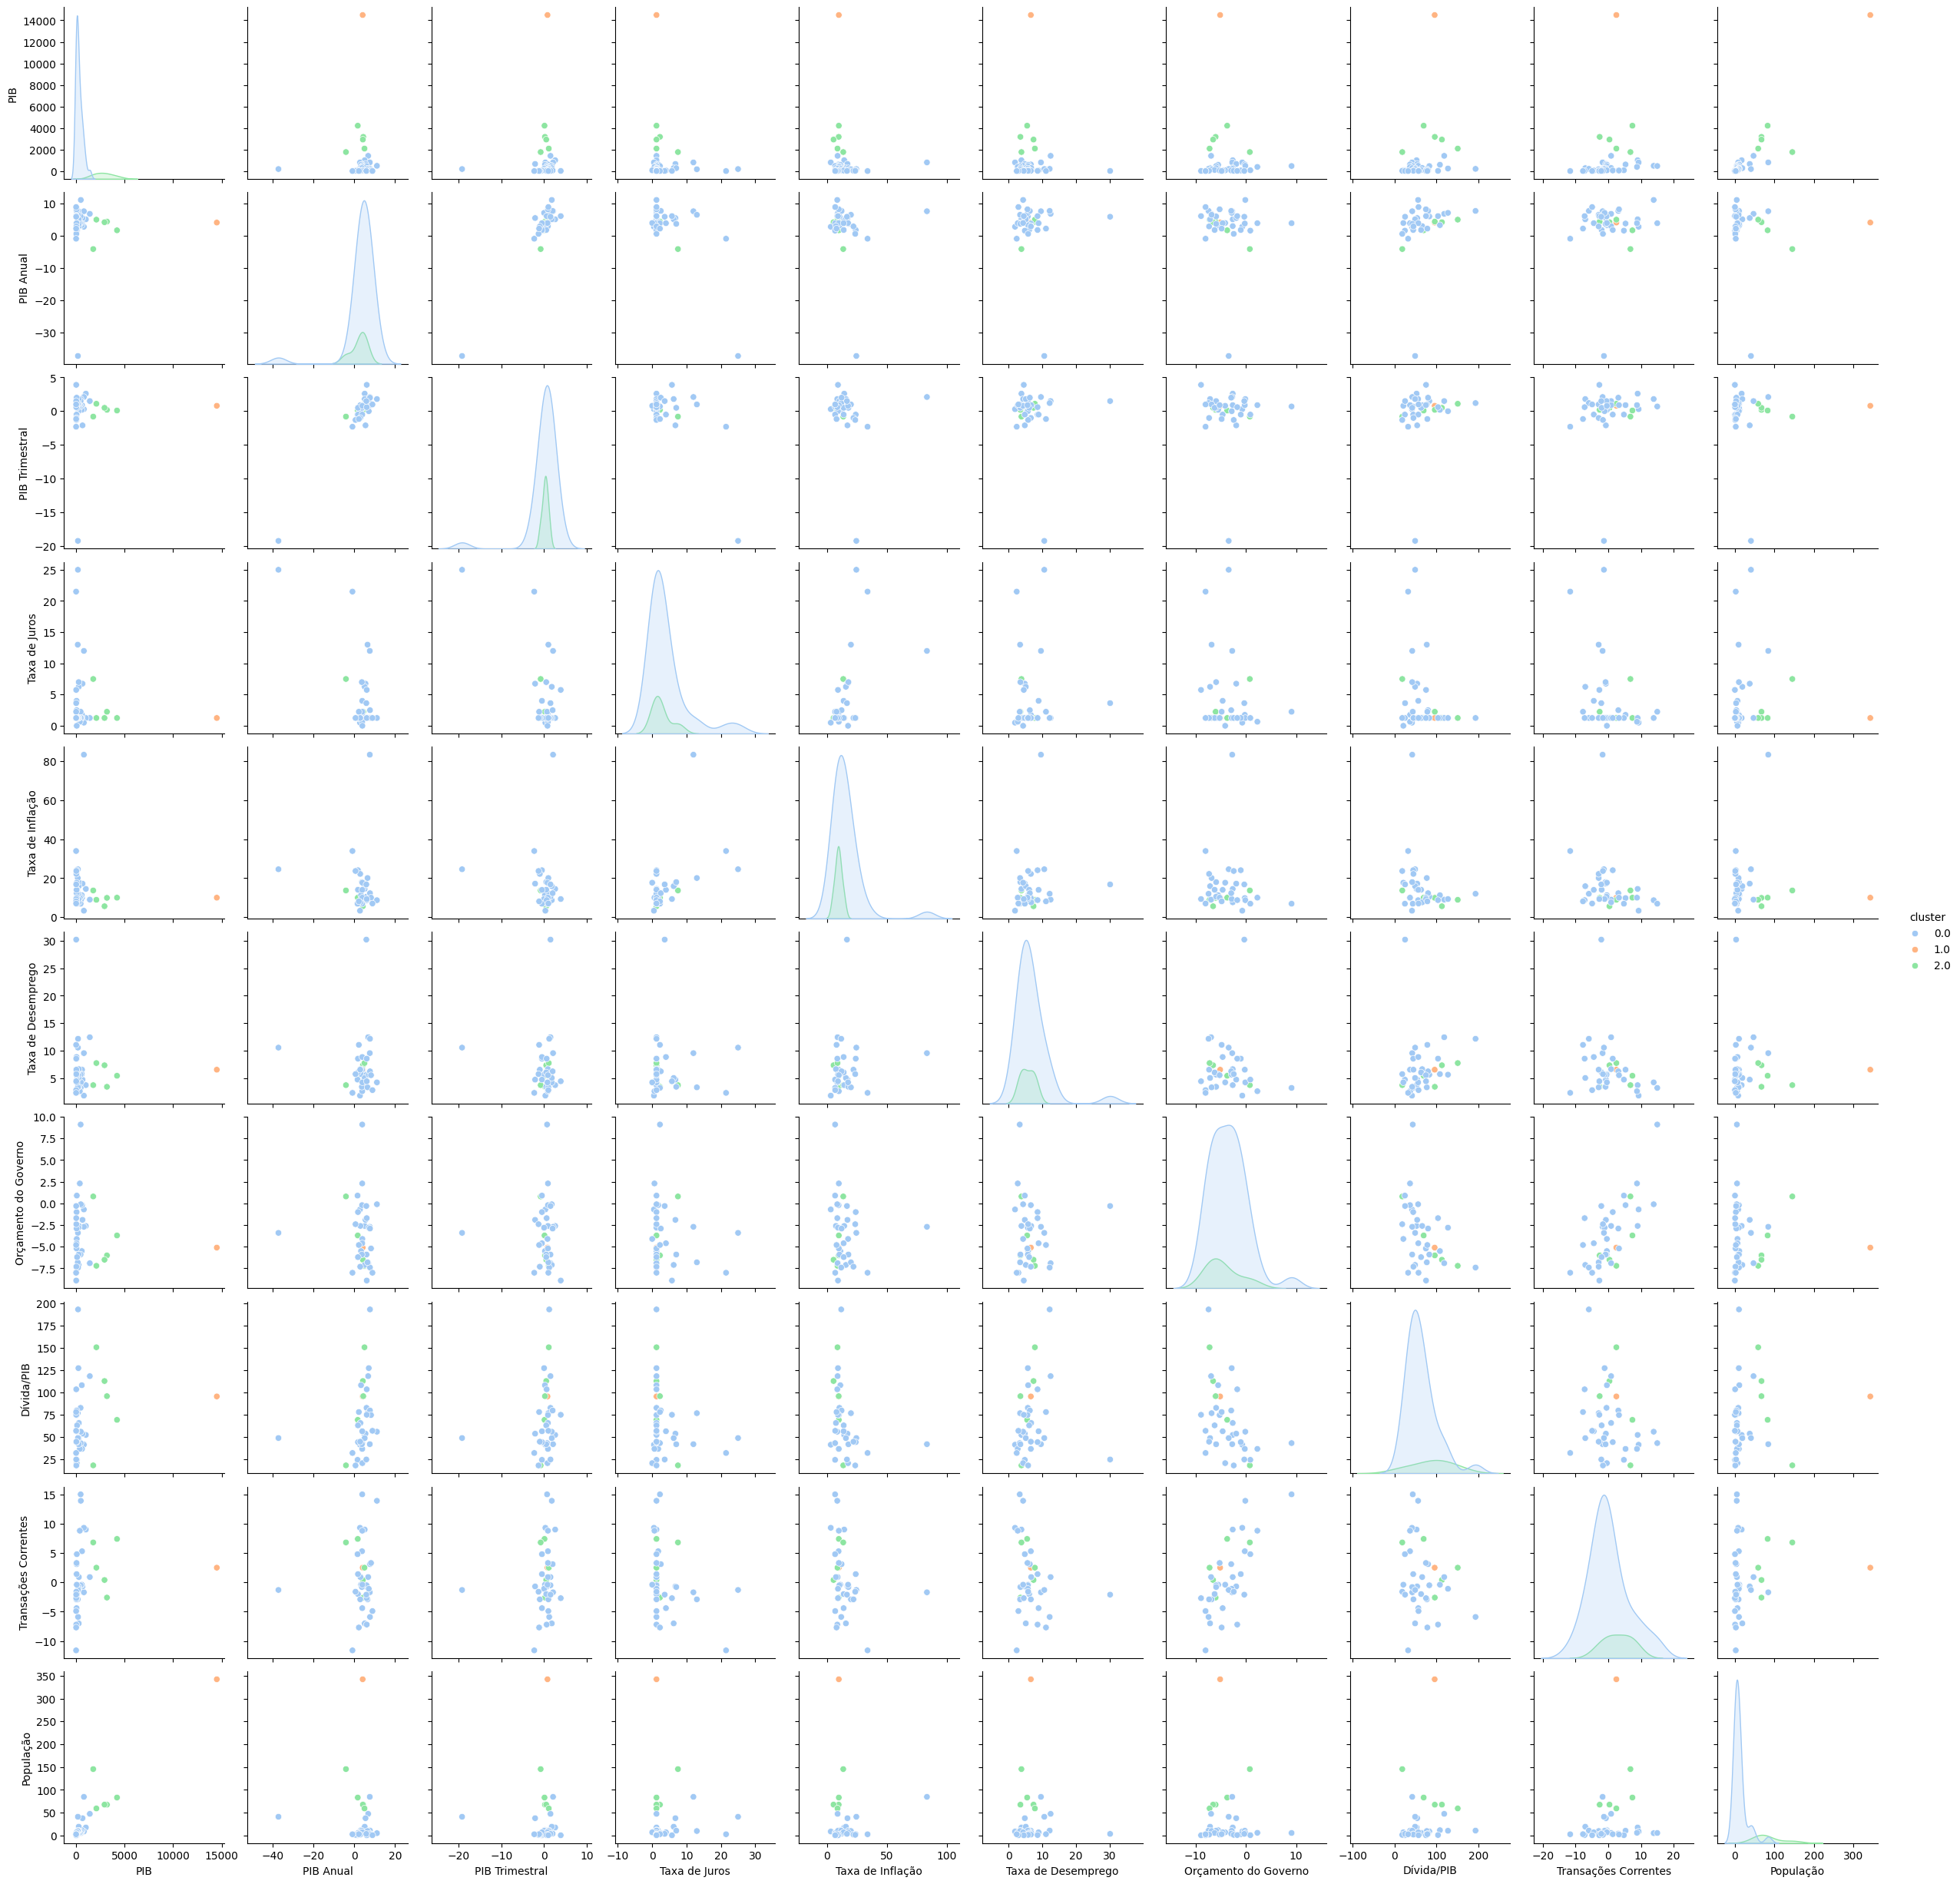

In [27]:
  modelo = KMeans(n_clusters=3, n_init=10, random_state=42)
  modelo.fit(var_economia)

  clusters = modelo.labels_
df_cluster = pd.concat([var_economia, pd.DataFrame(clusters, columns=['cluster'])], axis=1)

sns.pairplot(data=df_cluster, hue='cluster', palette="pastel");

<h2>Modelo com 4 clusters</h2>

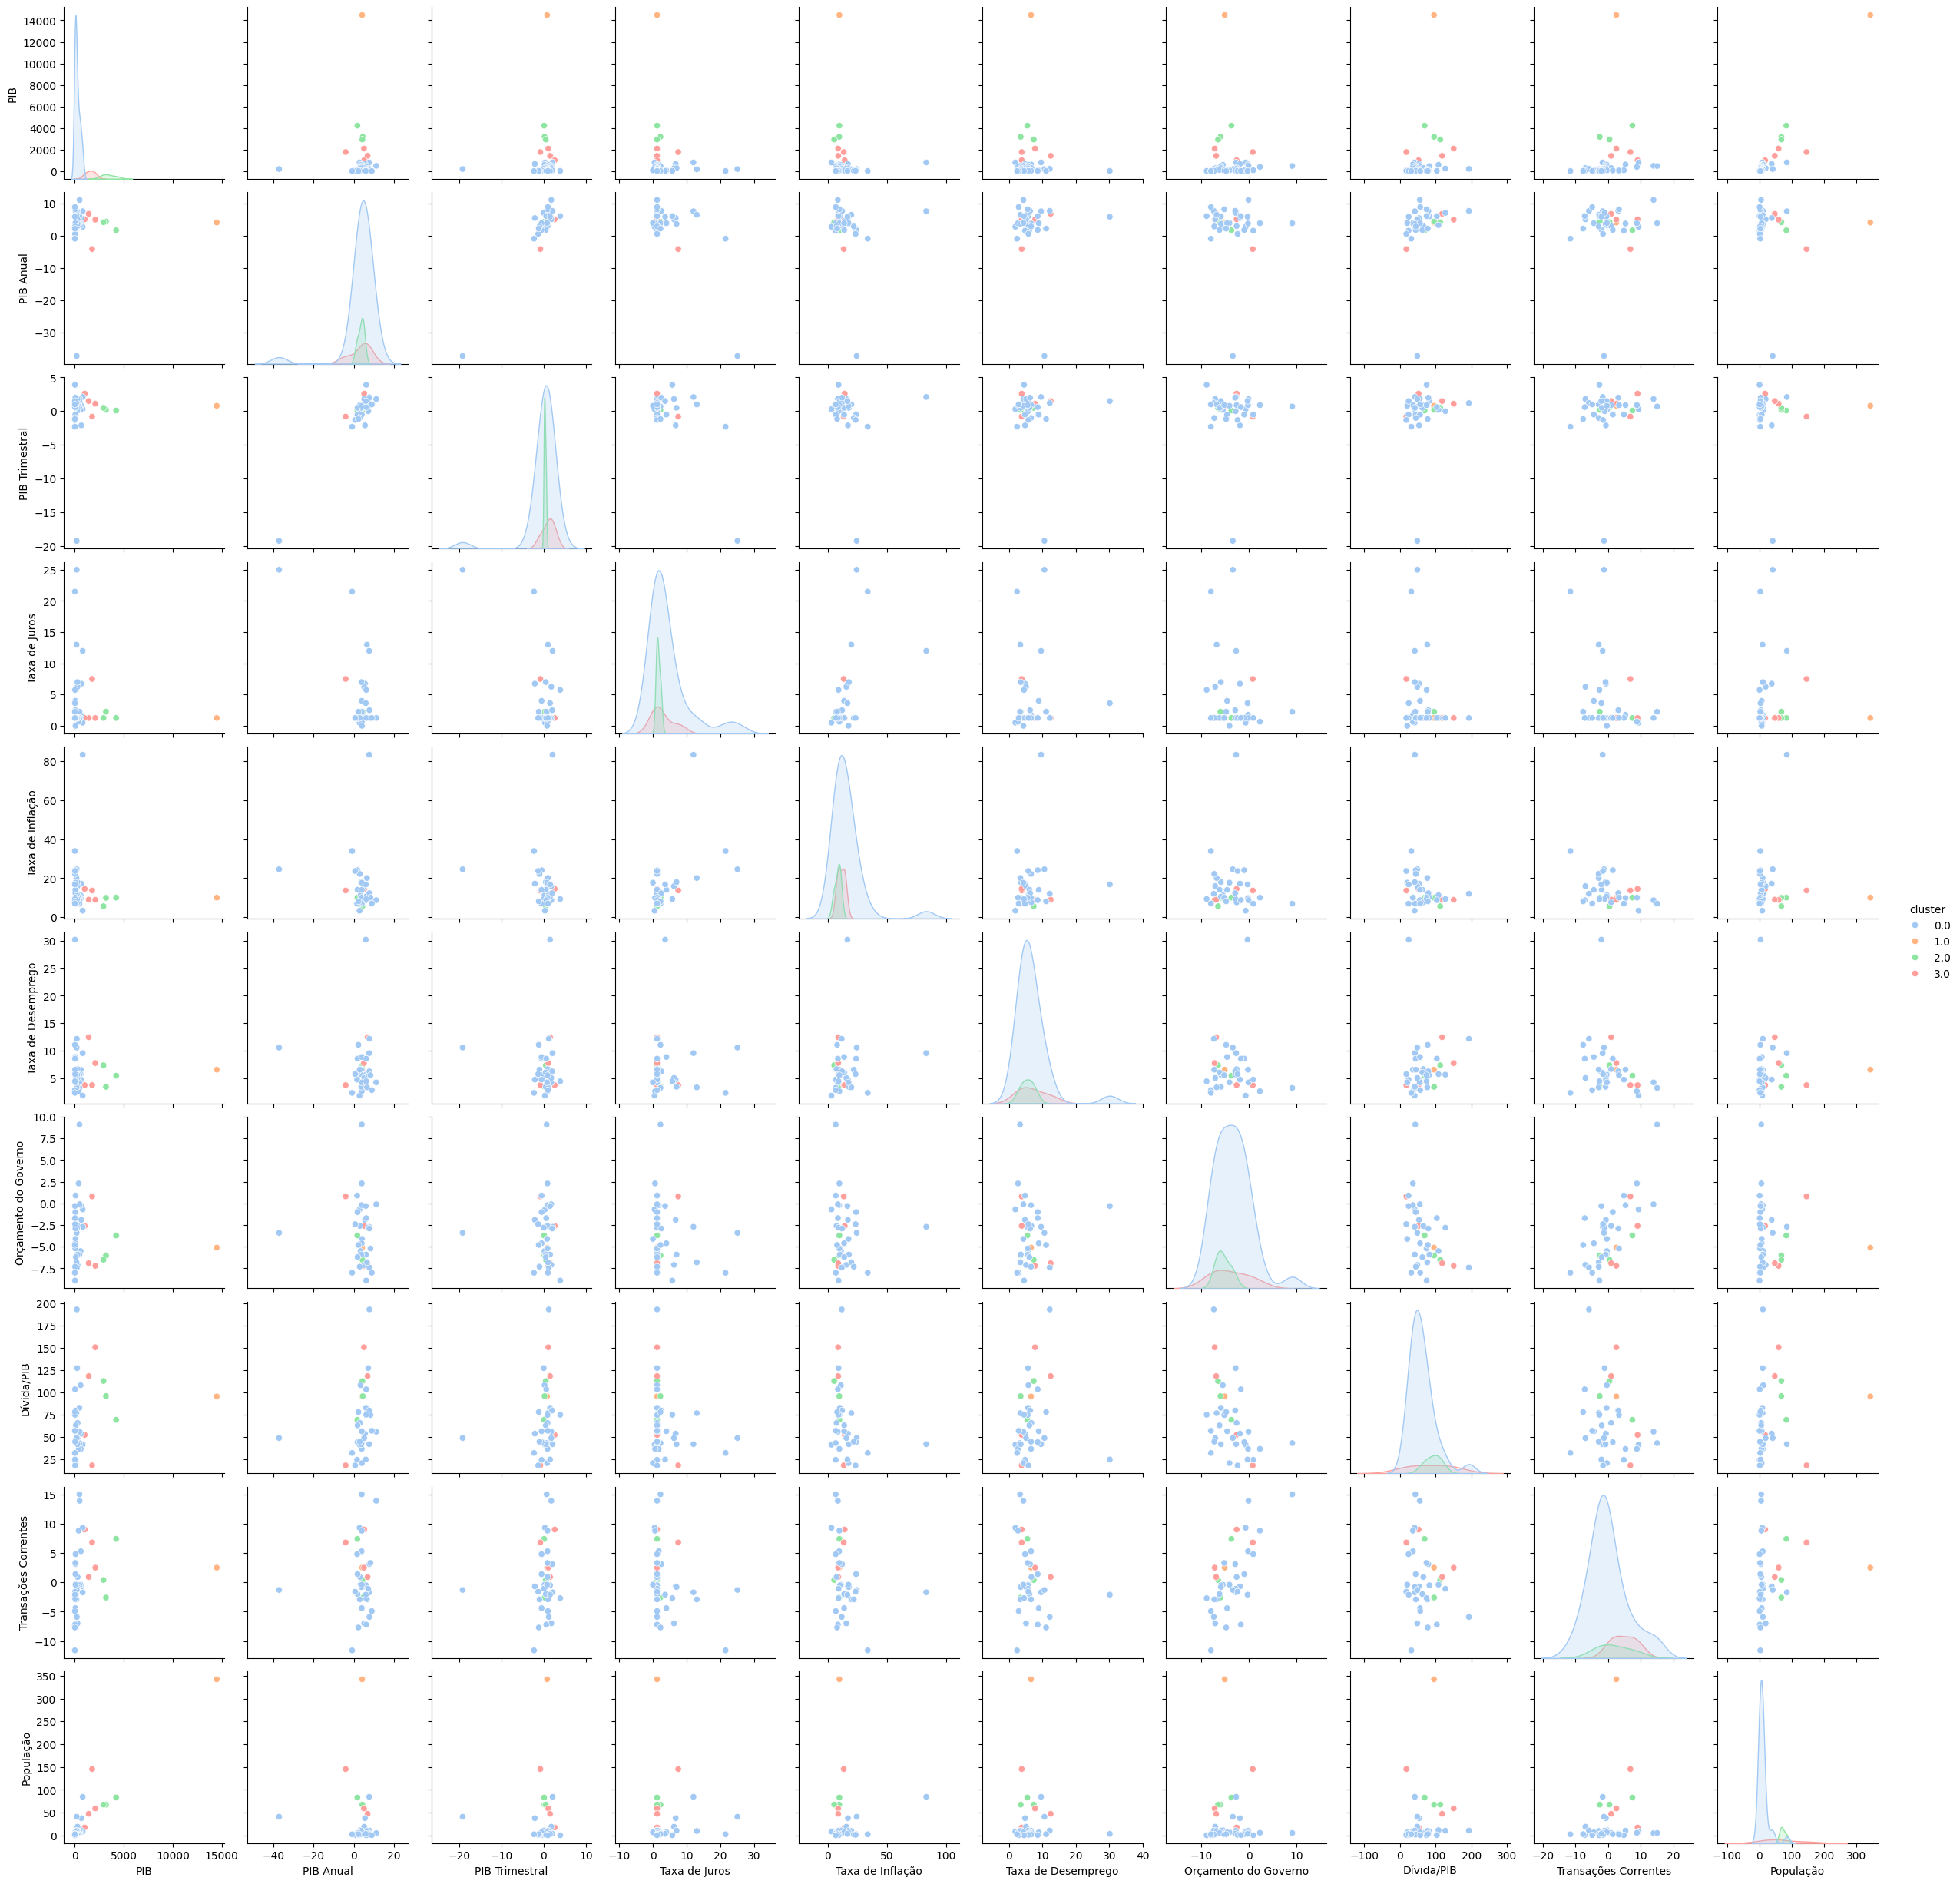

In [28]:
  modelo = KMeans(n_clusters=4, n_init=10, random_state=42)
  modelo.fit(var_economia)

  clusters = modelo.labels_
df_cluster = pd.concat([var_economia, pd.DataFrame(clusters, columns=['cluster'])], axis=1)

sns.pairplot(data=df_cluster, hue='cluster', palette="pastel");

In [29]:
modelo = KMeans(n_clusters=2, n_init=10, random_state=42)

labels = modelo.fit_predict(var_economia)

df['Cluster_2'] = pd.Series(labels, index=var_economia.index)
display(df.head())


Pais    PIB  PIB Anual  PIB Trimestral  Taxa de Juros  \
0       Euro Area  14493        4.1             0.8           1.25   
1         Germany   4223        1.7             0.1           1.25   
2  United Kingdom   3187        4.4             0.2           2.25   
3          France   2937        4.2             0.5           1.25   
4           Italy   2100        5.0             1.1           1.25   

   Taxa de Inflação  Taxa de Desemprego  Orçamento do Governo  Dívida/PIB  \
0              10.0                 6.6                  -5.1        95.6   
1              10.0                 5.5                  -3.7        69.3   
2               9.9                 3.5                  -6.0        95.9   
3               5.6                 7.4                  -6.5       112.9   
4               8.9                 7.8                  -7.2       150.8   

   Transações Correntes  População  Cluster_2  
0                   2.5     342.56        1.0  
1                   7.4      83.16        0.0  
2                  -2.6      67.53        0.0  
3                   0.4      67.63        0.0  
4                   2.5      59.24        0.0

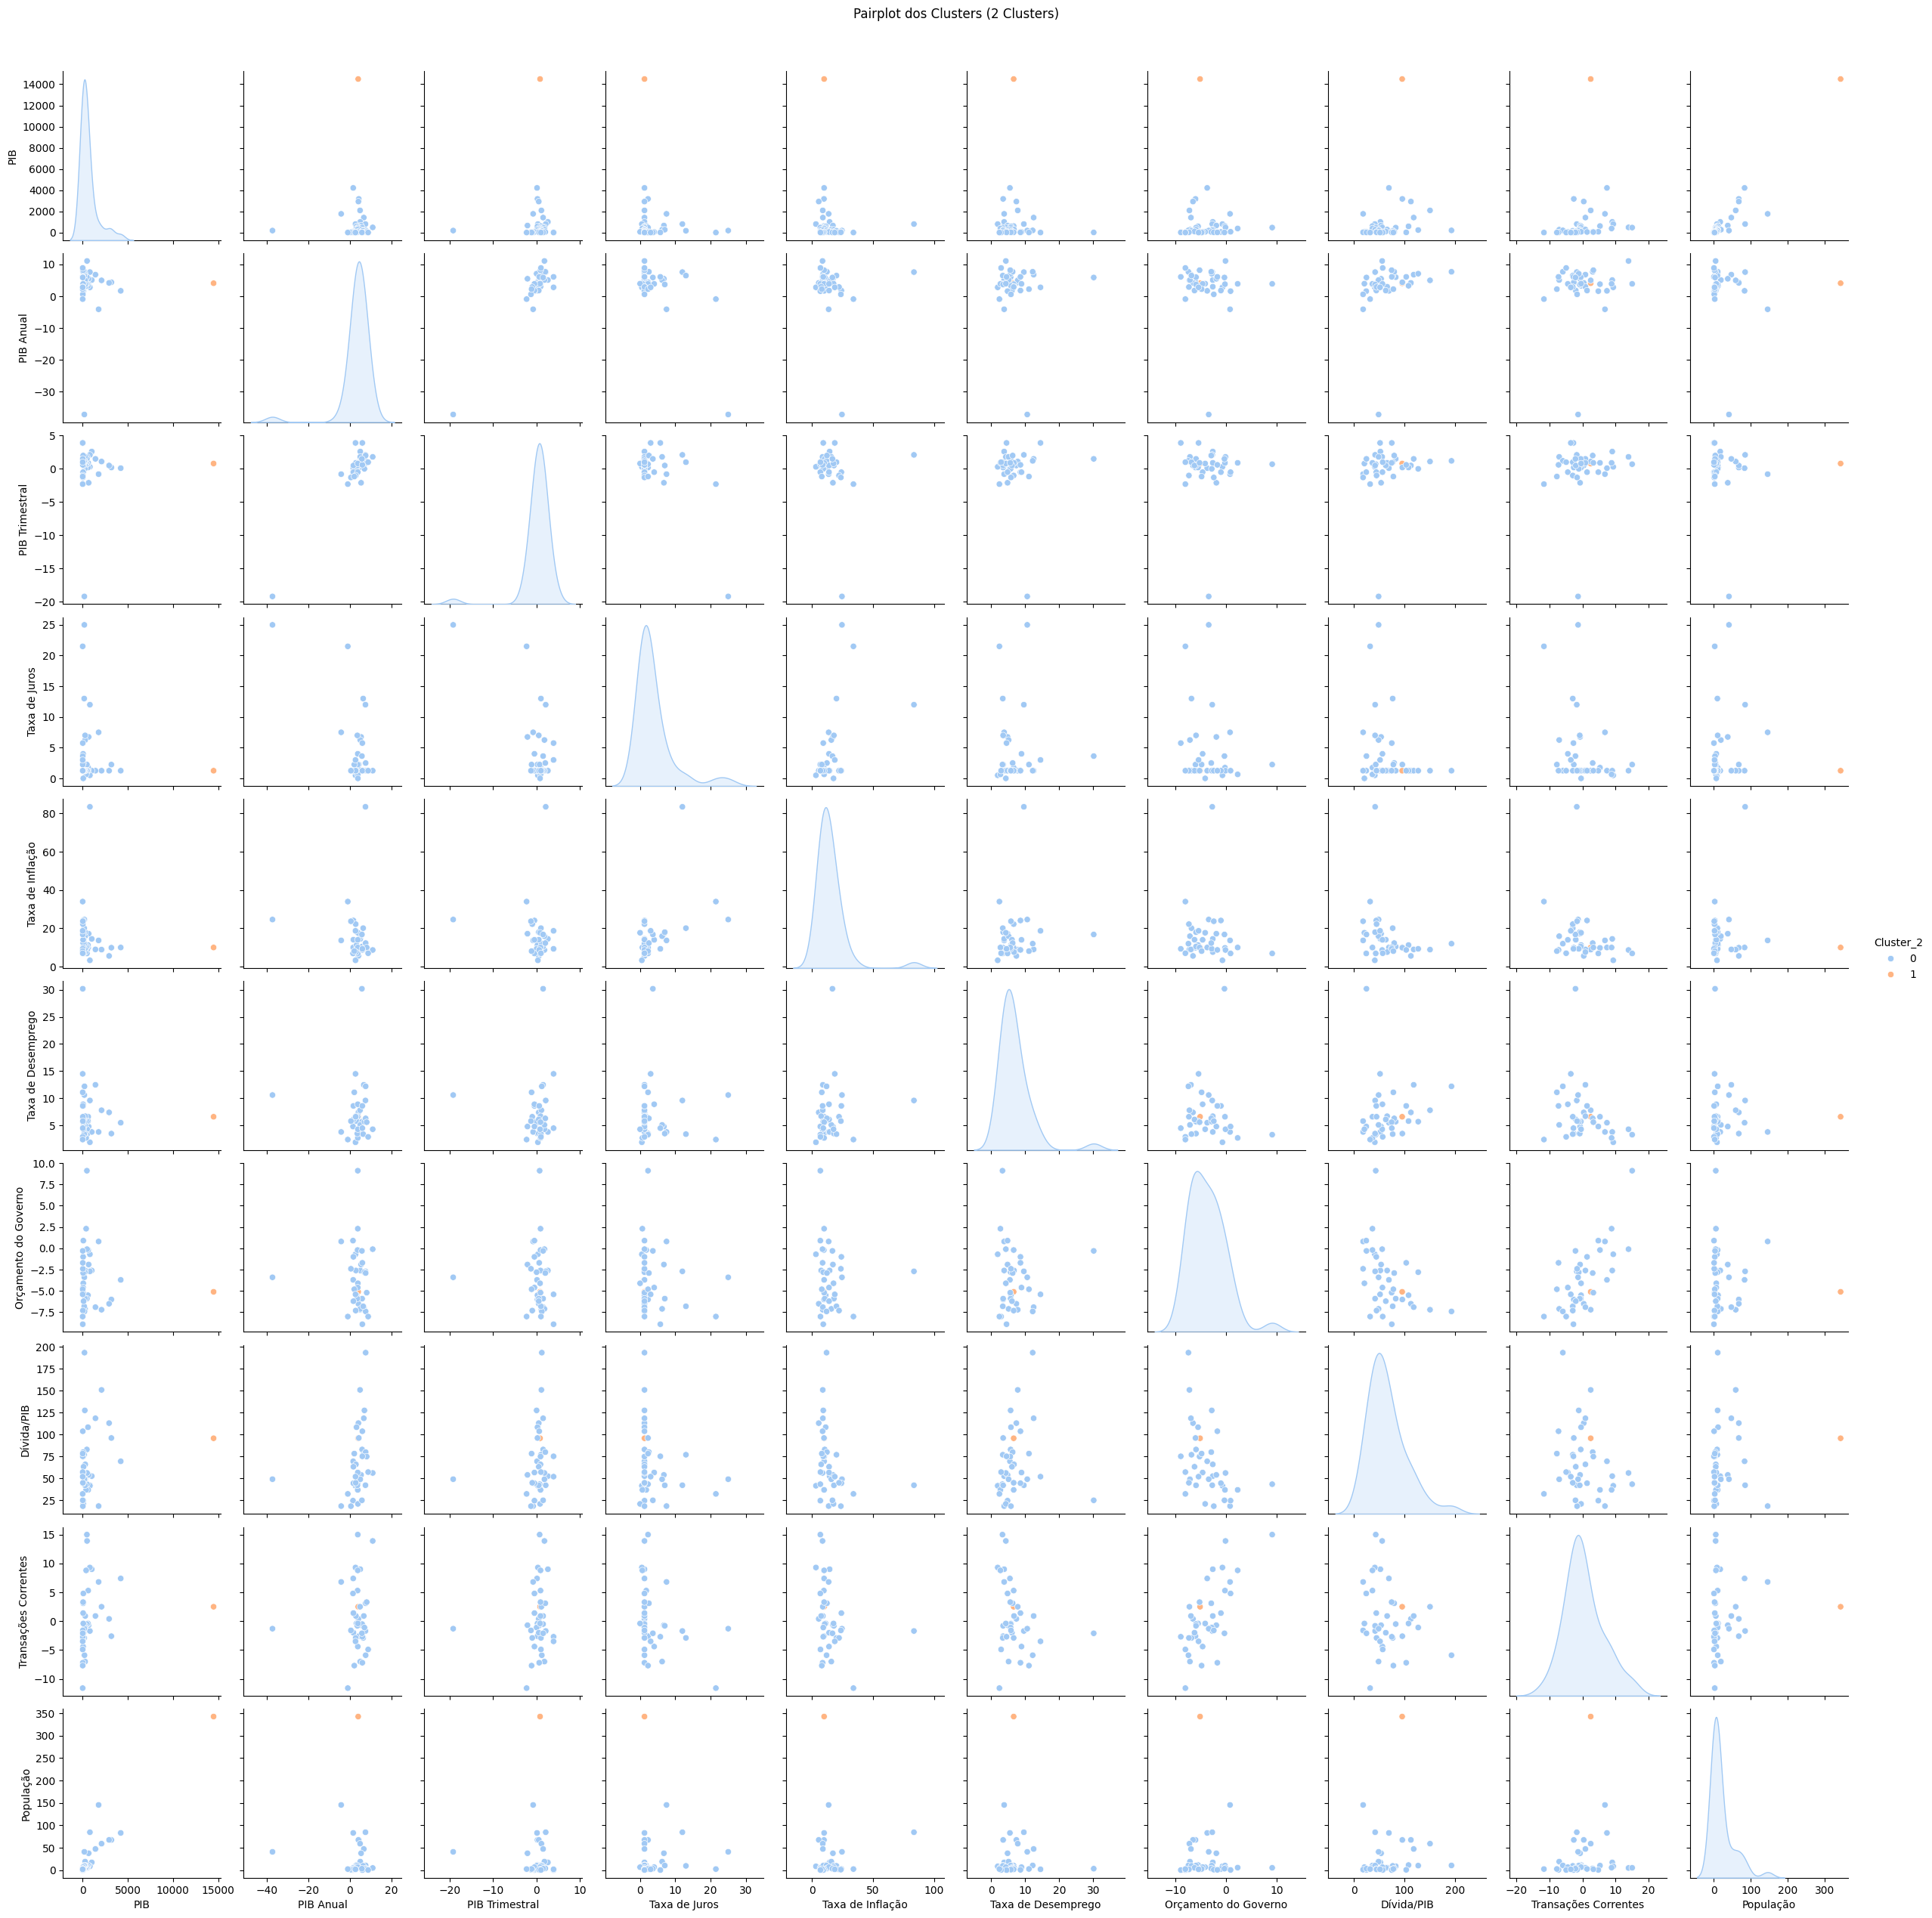

In [30]:
df_clustered_2 = df.dropna(subset=['Cluster_2']).copy()

df_clustered_2['Cluster_2'] = df_clustered_2['Cluster_2'].astype(int)

numerical_cols = df_clustered_2.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'Cluster' in numerical_cols:
    numerical_cols.remove('Cluster')
numerical_cols.remove('Cluster_2') # Remove the new cluster column as well

sns.pairplot(data=df_clustered_2, hue='Cluster_2', palette="pastel", vars=numerical_cols);
plt.suptitle('Pairplot dos Clusters (2 Clusters)', y=1.02)
plt.show()

<h2>Comclusão</h2>
<p>
O modelo com 2 clusters parece ser o ideal, refletindo a realidade macroeconômica dos países da Europa, onde podemos encontrar a Europa Ocidental e o Norte Europeu com uma economia mais robusta, e o Leste, Sudeste e Sul Europeu com uma economia menor. O período em que os dados foram coletados, em 2022, foi o ano em que começou a guerra na Ucrânia, com crises econômicas acontecendo em muitos países da Europa Ocidental.
</p>